In [19]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import seaborn as sns

import sys
sys.path.append("../../bayseg/")
import bayseg

# Data Import

In [20]:
data = pd.read_csv("../data/2016-ml-contest-Hall/training_data.csv")

In [21]:
data.tail()

Facies Formation        Well Name   Depth      GR  ILD_log10  DeltaPHI  \
3227       5      C LM  CHURCHMAN BIBLE  3120.5  46.719      0.947     1.828   
3228       5      C LM  CHURCHMAN BIBLE  3121.0  44.563      0.953     2.241   
3229       5      C LM  CHURCHMAN BIBLE  3121.5  49.719      0.964     2.925   
3230       5      C LM  CHURCHMAN BIBLE  3122.0  51.469      0.965     3.083   
3231       5      C LM  CHURCHMAN BIBLE  3122.5  50.031      0.970     2.609   

      PHIND     PE  NM_M  RELPOS  
3227  7.254  3.617     2   0.685  
3228  8.013  3.344     2   0.677  
3229  8.013  3.190     2   0.669  
3230  7.708  3.152     2   0.661  
3231  6.668  3.295     2   0.653

In [22]:
facies_classes = np.unique(data["Facies"])
n_facies_classes = len(facies_classes)
print(n_facies_classes, facies_classes)

9 [1 2 3 4 5 6 7 8 9]


In [23]:
test_well = data[data["Well Name"] == "SHANKLE"]

In [24]:
feature_names =  ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND','PE']
feature_vectors = data[feature_names]

In [25]:
a = np.array(feature_vectors.index)
b = np.zeros((len(feature_vectors),1))
b[:,0] = a

In [26]:
a

array([   0,    1,    2, ..., 3229, 3230, 3231], dtype=int64)

In [27]:
np.shape(np.array([a]).T)

(3232, 1)

In [28]:
data["Depth"].values

array([ 2793. ,  2793.5,  2794. , ...,  3121.5,  3122. ,  3122.5])

In [29]:
np.shape(b)

(3232, 1)

In [30]:
def normalize_feature_vectors(feature_vectors):
    return (feature_vectors - np.mean(feature_vectors, axis=0).T) / np.std(feature_vectors, axis=0)

In [13]:
feature_vectors_norm = normalize_feature_vectors(feature_vectors.values)

In [31]:
feature_vectors_norm

array([[ 0.36674916,  0.08800759,  1.21273704, -0.20372255,  0.9765322 ],
       [ 0.39300519,  0.07560101,  2.03520936, -0.11928272,  0.41850492],
       [ 0.41861293,  0.06319443,  2.14997295, -0.05627761, -0.13952236],
       ..., 
       [-0.5321472 ,  1.3286659 , -0.12138959, -0.71062135, -0.59710473],
       [-0.47542121,  1.33280142, -0.09116852, -0.75024311, -0.6395148 ],
       [-0.52203377,  1.35347906, -0.18183174, -0.88534684, -0.479919  ]])

In [32]:
clf = bayseg.BaySeg(b, feature_vectors_norm, n_labels=9)

In [33]:
clf.fit(25, 
        beta_jump_length=3.5, 
        mu_jump_length=0.0005, 
        cov_volume_jump_length=0.00005, 
        theta_jump_length=0.0000005, verbose=False)

  8%|██████▍                                                                         | 2/25 [00:04<00:50,  2.20s/it]../../bayseg\bayseg\bayseg.py:288: RuntimeWarning: overflow encountered in exp
  acc_ratio = np.exp(log_target_prop - log_target_prev)
100%|███████████████████████████████████████████████████████████████████████████████| 25/25 [00:54<00:00,  2.17s/it]


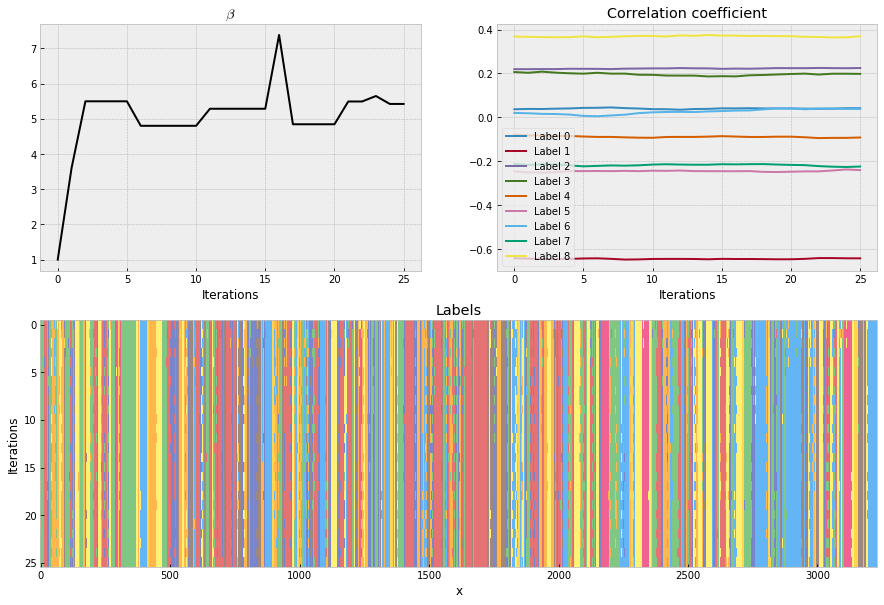

In [17]:
clf.diagnostics_plot()

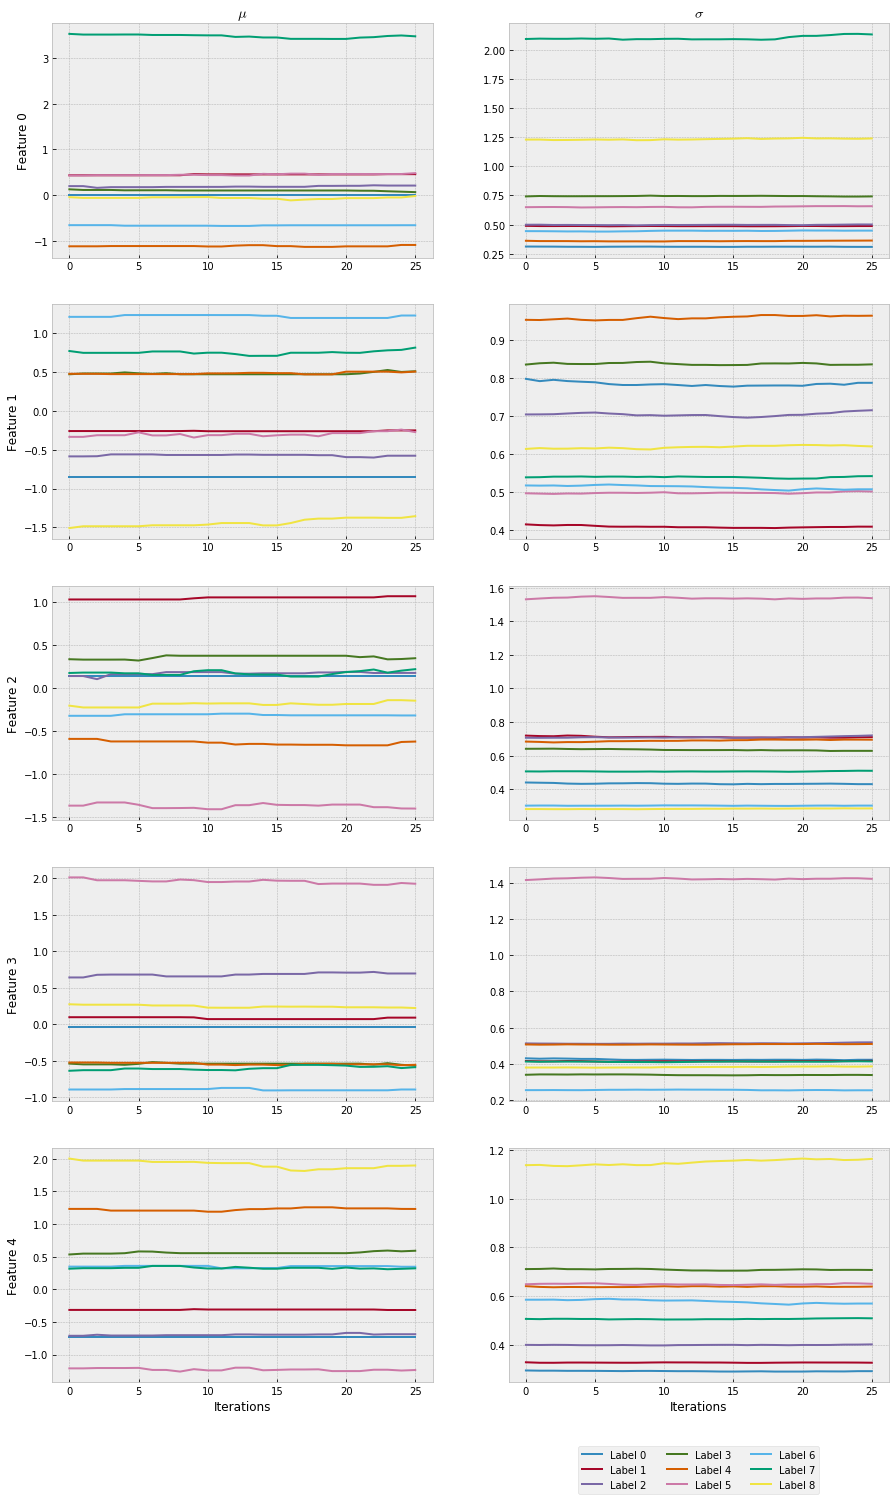

In [18]:
clf.plot_mu_stdev()

# todo: fix labels

In [67]:
feature_names

['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']

In [ ]:
feature_vectors)

In [134]:
# take the mean mu of the last iterations
mu_post = np.mean(model.mus[-25:], axis=0)
# generate mu for reality
mu_real = np.zeros((9,5))
for l in np.unique(data["Facies"]):
    mu_real[l-1,:] = np.mean(data[data["Facies"]==l][feature_names].values, axis=0)
    
mu_real = normalize_feature_vectors(mu_real)

In [135]:
mu_real

array([[-0.02736751, -1.60802988,  0.01467356,  0.52756659, -1.33975655],
       [ 0.67129631, -0.53911248,  1.07943634,  0.62687362, -0.91433961],
       [ 1.03833468, -0.54314302,  0.18651046,  2.08436353, -1.03117386],
       [ 1.88543675,  0.84294188,  1.23887764, -0.45636454, -0.08748929],
       [-0.29591115,  1.10776132,  0.14974315, -0.88313094,  0.18446967],
       [-0.64555643,  1.49364191, -0.44473642, -1.45206846,  0.52112418],
       [-0.01928818, -1.03786809,  0.91671893,  0.3293465 , -0.27186431],
       [-1.22333694,  0.66271951, -1.20266633, -0.87687668,  0.92197316],
       [-1.38360754, -0.37891117, -1.93855734,  0.10029038,  2.01705661]])

In [122]:
mu_post

array([[ 0.0378915 , -1.34598185,  0.19952048,  0.27817386, -0.94648572],
       [ 0.13068025, -0.12576397,  0.07226503, -0.23020683, -0.50023129],
       [ 0.40249984, -0.70886751, -1.26889362,  2.20860578, -1.26721962],
       [-0.42601662,  1.24837905, -0.12189737, -0.85458543,  0.43052017],
       [ 2.08245576,  0.68891542, -0.02937278, -0.69503133,  0.59529526],
       [-0.22766775, -0.84206531, -0.11213595, -0.0022146 ,  1.51415568],
       [ 0.33370175, -0.21970854, -0.28631107,  0.89388334, -0.59998634],
       [-1.19378163,  0.70229812, -0.56412637, -0.68066802,  1.20654478],
       [ 0.35775659, -0.22315247,  1.32597541, -0.03122848, -0.21530958]])

In [114]:
mu_post[0,:]

array([ 0.0378915 , -1.34598185,  0.19952048,  0.27817386, -0.94648572])

In [148]:
np.argmin(np.average(np.abs(mu_real - mu_post[0,:]), axis=1))

0

In [149]:
for l in range(9):
    i = np.argmin(np.average(np.abs(mu_real - mu_post[l,:]), axis=1))
    print(i)

0
6
2
4
3
6
1
7
6


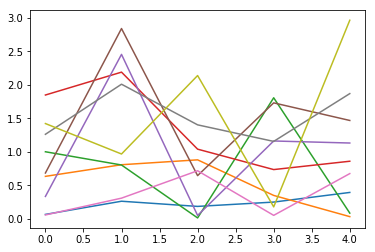

In [150]:
for i in range(9):
    plt.plot(np.abs(mu_real - mu_post[0,:])[i,:])

# Comparison

In [21]:
indeces = np.where(data["Well Name"] == "SHANKLE")[0]

In [37]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [41]:
test_well.head()

Facies Formation Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
471       2     A1 SH   SHANKLE  2774.5  98.36      0.642      -0.1  18.685   
472       2     A1 SH   SHANKLE  2775.0  97.57      0.631       7.9  16.745   
473       2     A1 SH   SHANKLE  2775.5  98.41      0.615      12.8  14.105   
474       2     A1 SH   SHANKLE  2776.0  85.92      0.597      13.0  13.385   
475       2     A1 SH   SHANKLE  2776.5  83.16      0.592      12.3  13.345   

      PE  NM_M  RELPOS  
471  2.9     1   1.000  
472  3.2     1   0.984  
473  3.2     1   0.968  
474  3.4     1   0.952  
475  3.4     1   0.935

In [167]:
def plot_log(log, feature_names, segmentation=None):
    if segmentation is None:
        nc = len(feature_names)
    else:
        nc = len(feature_names) + 1
    
    fig, ax = plt.subplots(nrows=1, ncols=nc, figsize=(8,10), sharey=True)
    
    c = ["green", "blue", "gray", "red", "black"]
    for i,fn in enumerate(feature_names):
        ax[i].plot(log[fn], log["Depth"], linewidth=0.75, color=c[i])
        ax[i].set_title(fn)
    
    if segmentation is not None:
        expand = np.repeat(np.expand_dims(segmentation, 1), 100, 1)
        ax[nc - 1].imshow(expand, extent=[0, 100, log["Depth"].values[-1], log["Depth"].values[0]])
        ax[nc - 1].grid(False)
        empty_string_labels = ['']*100
        ax[nc - 1].set_xticklabels(empty_string_labels)
        ax[nc - 1].set_title("BaySeg")
    
    plt.tight_layout()
        

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


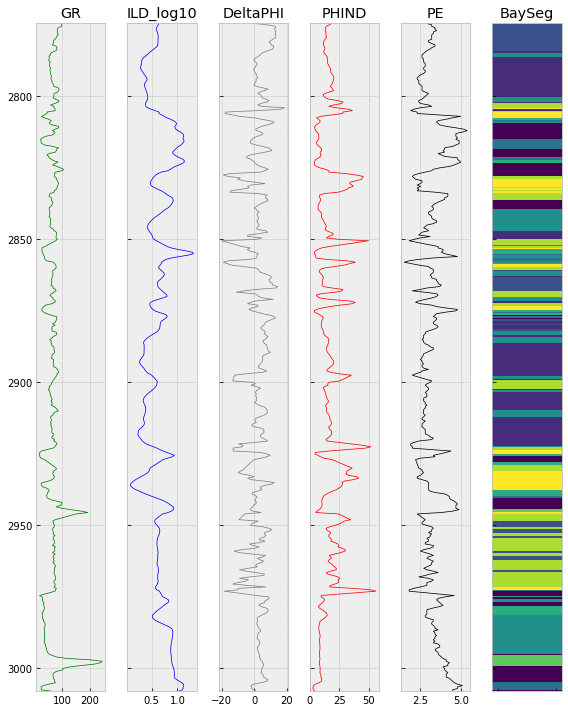

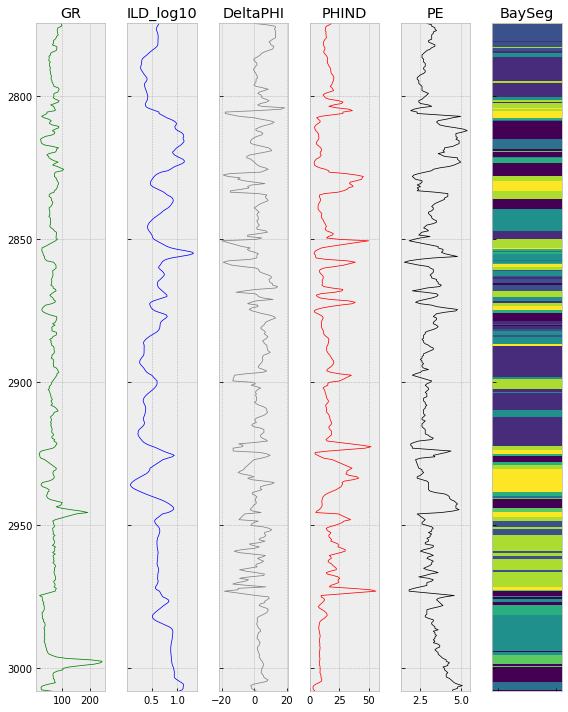

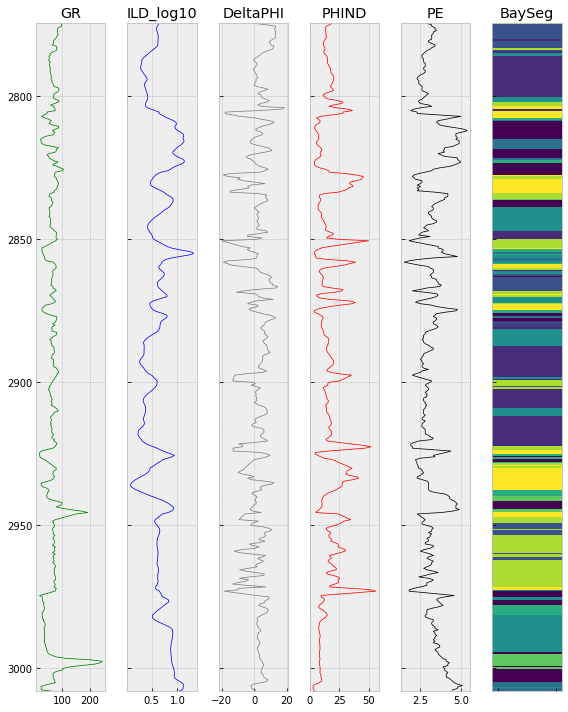

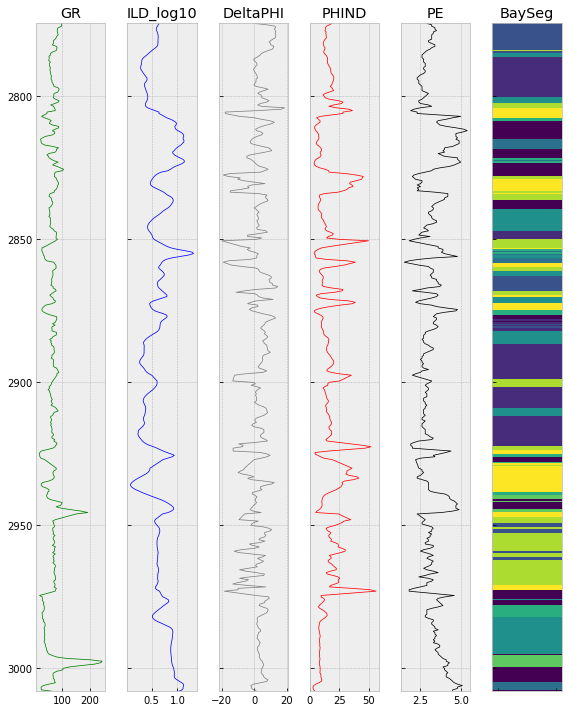

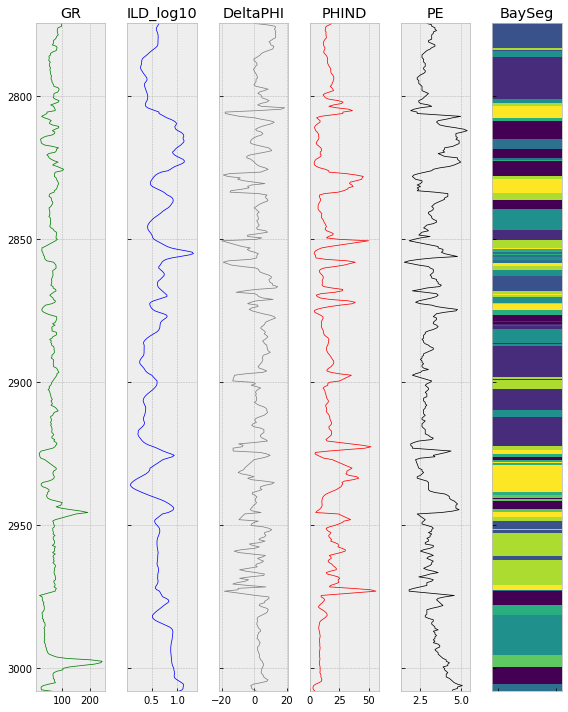

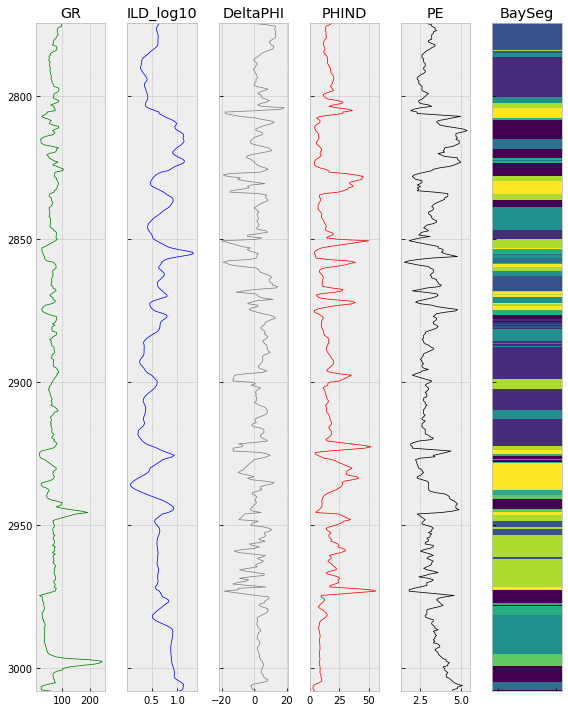

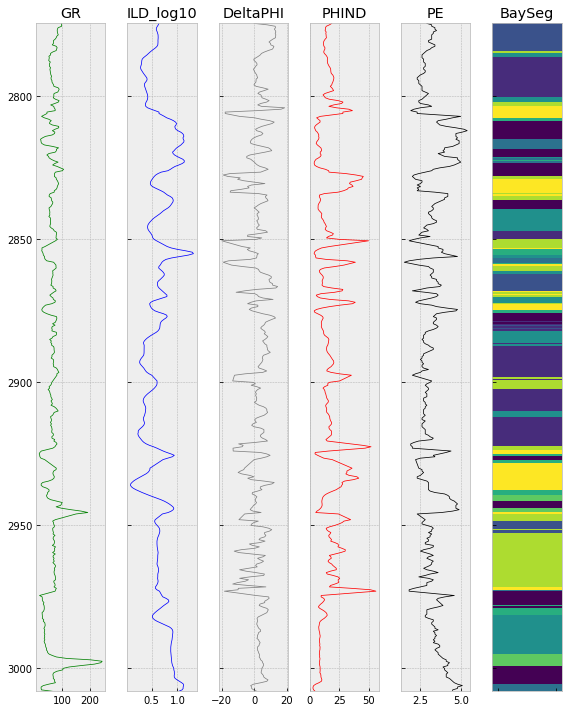

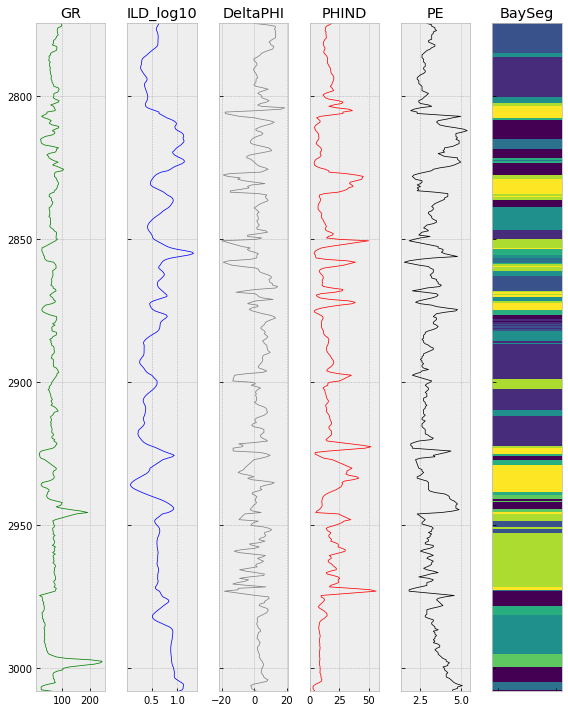

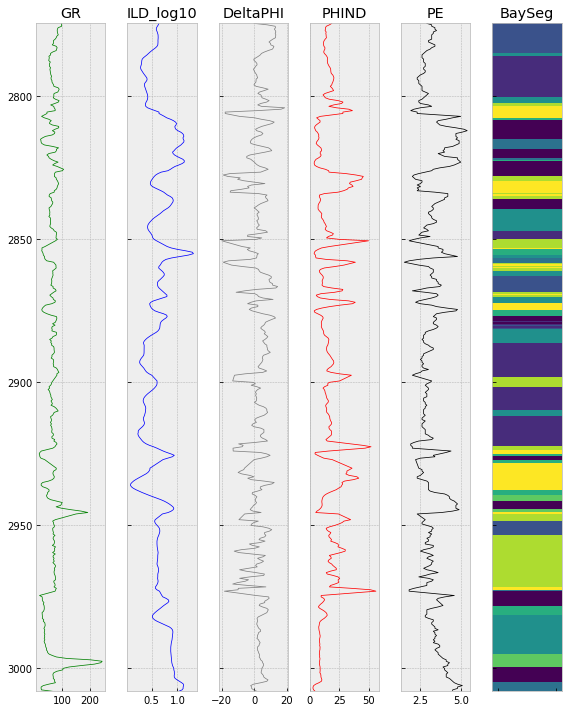

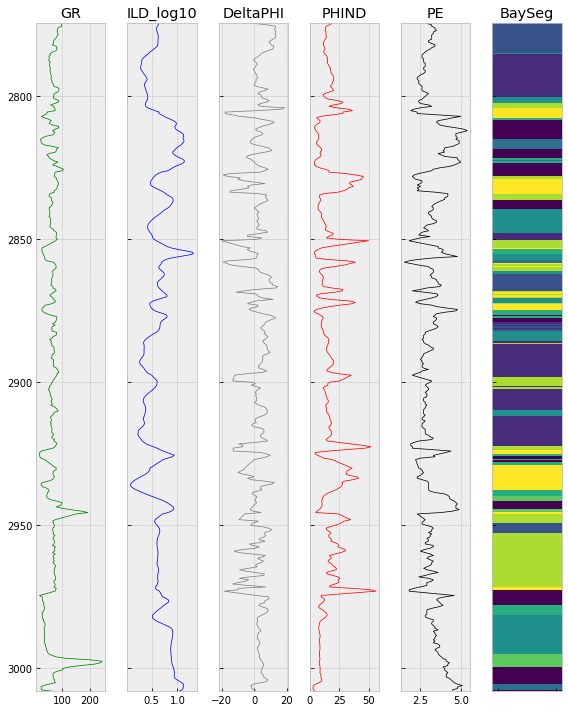

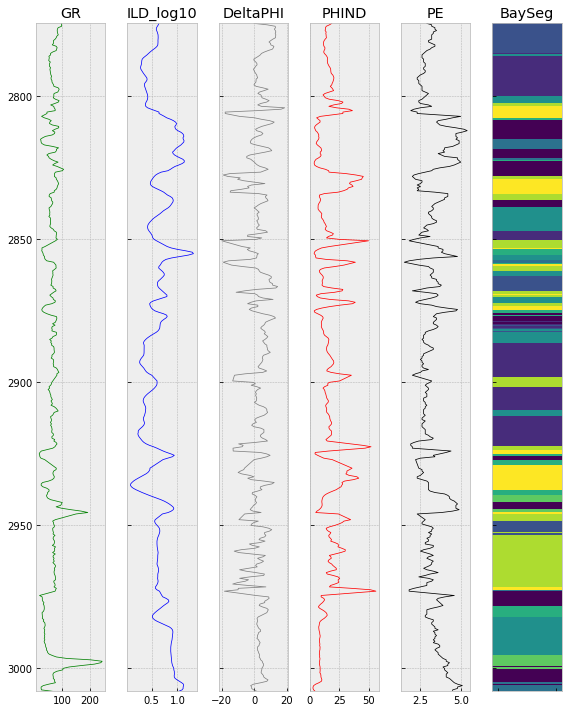

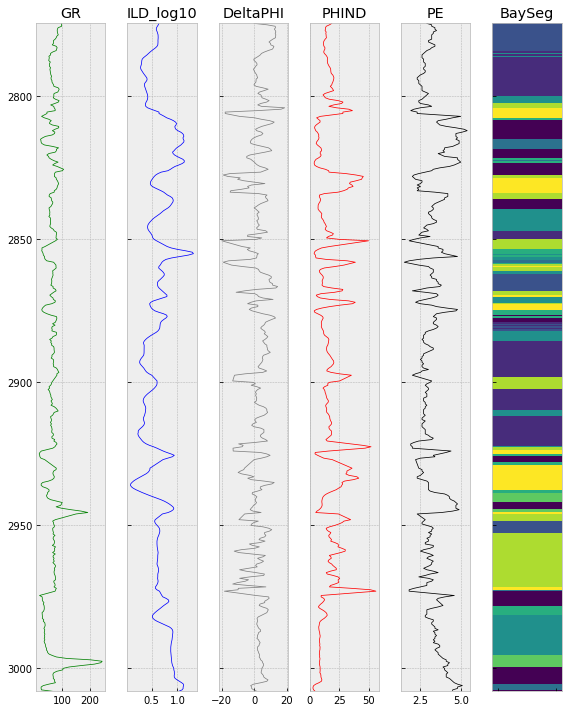

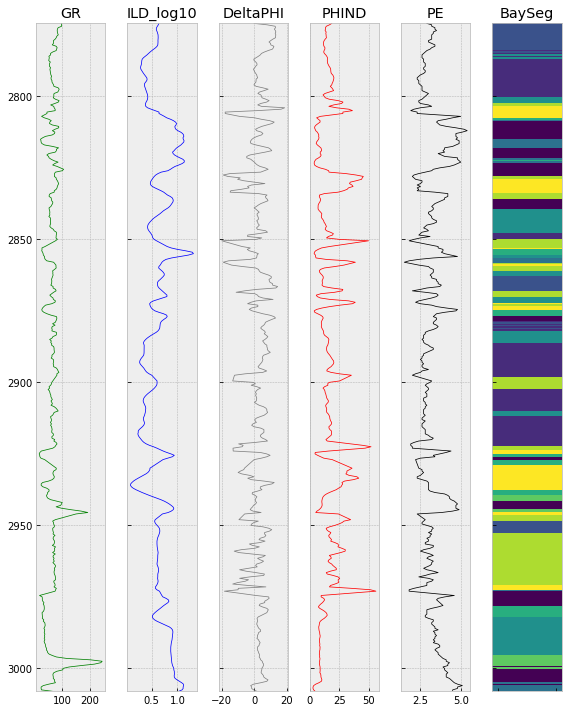

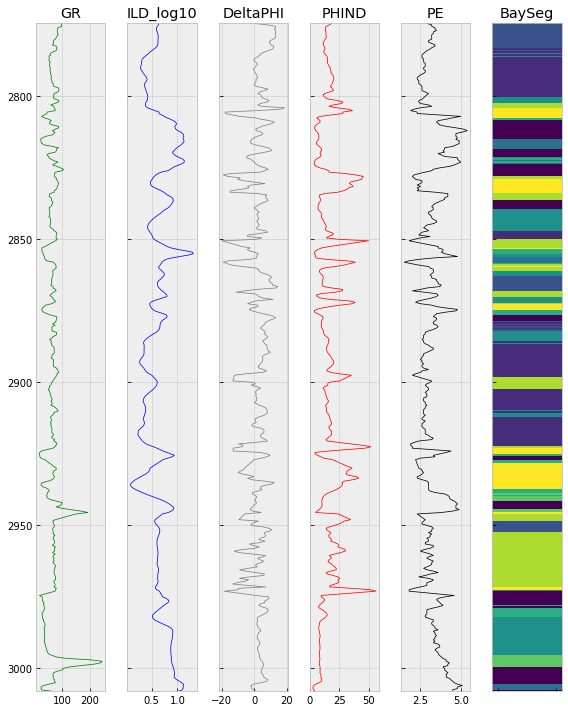

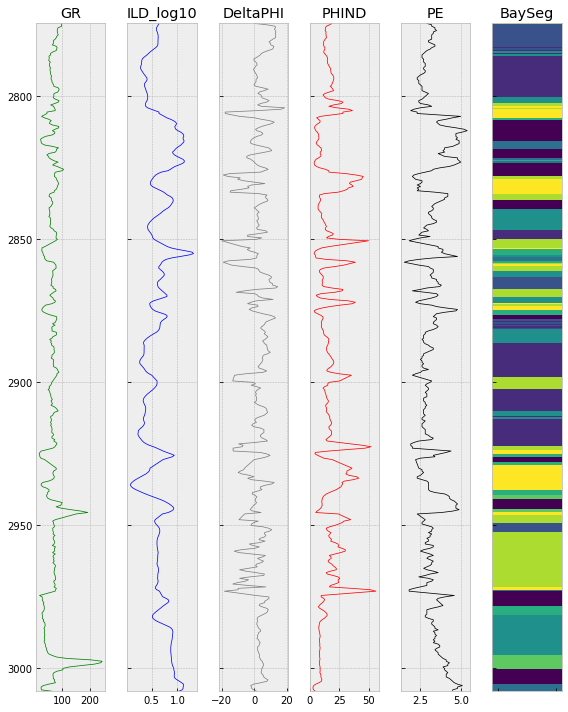

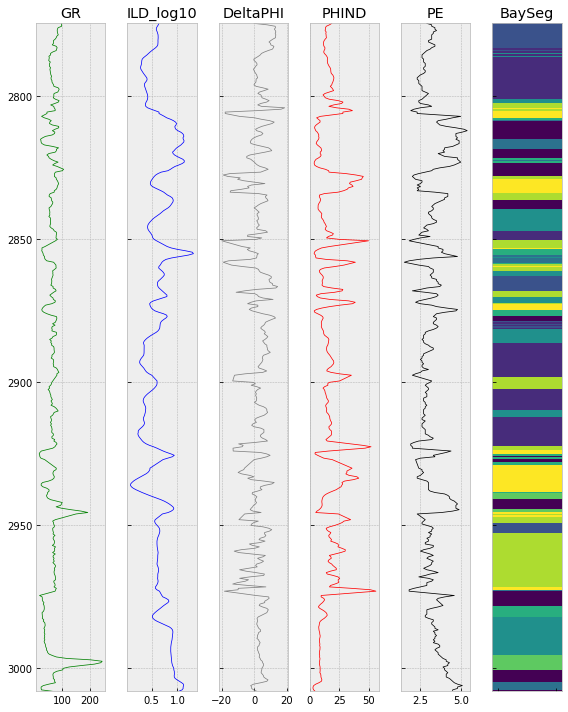

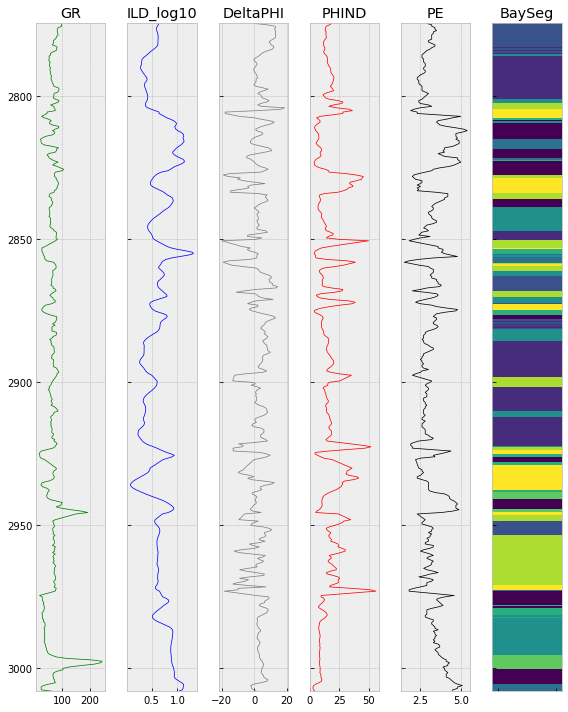

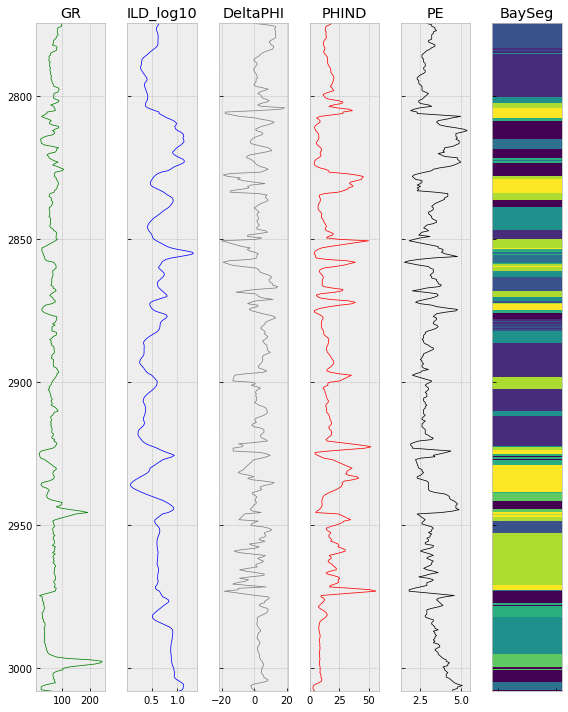

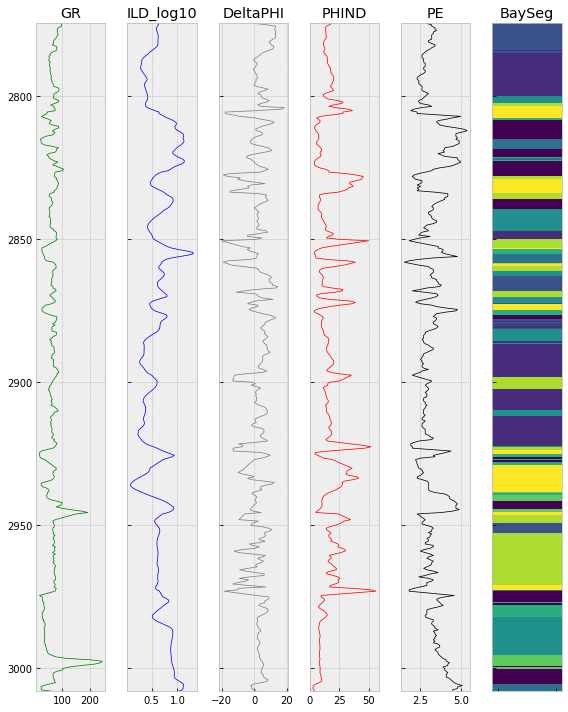

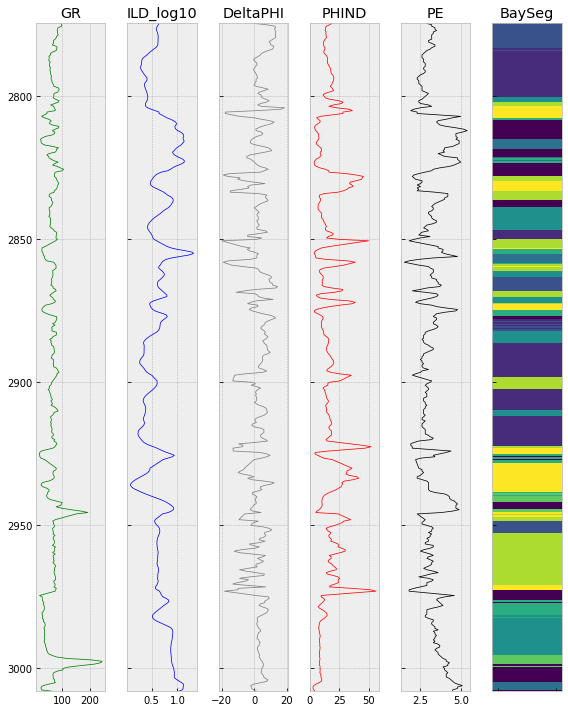

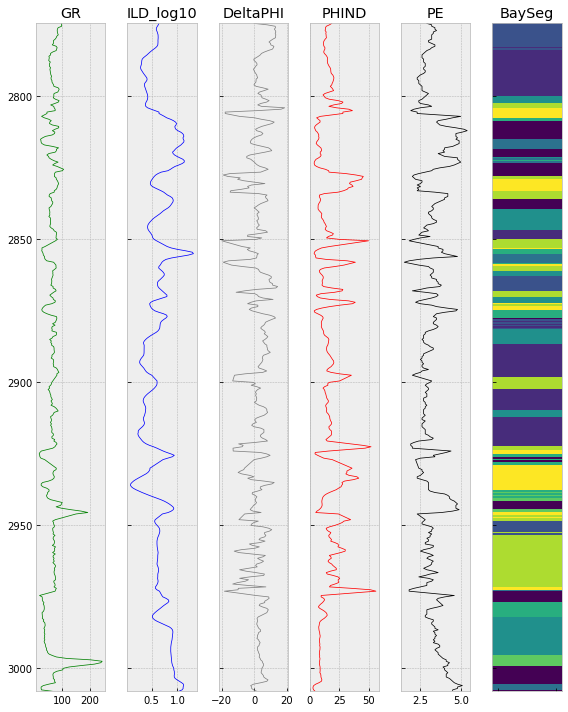

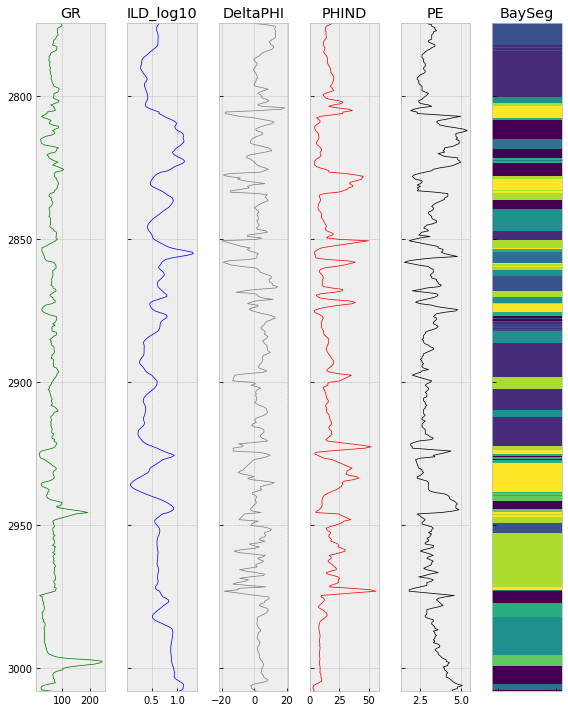

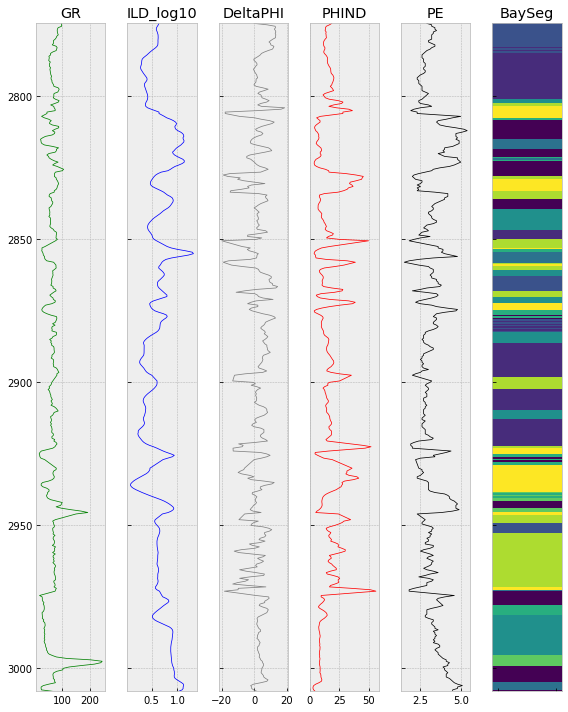

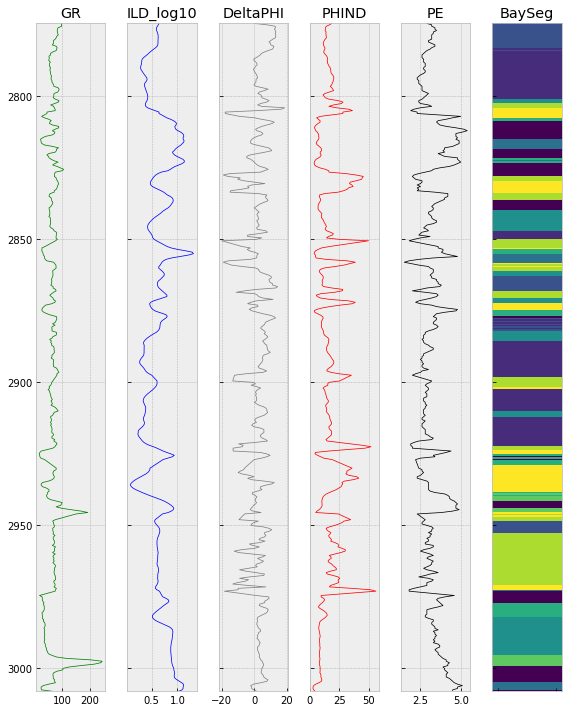

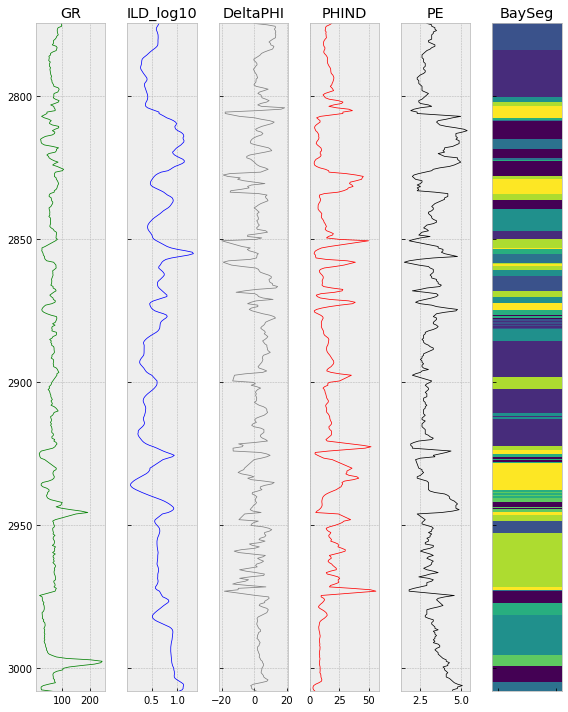

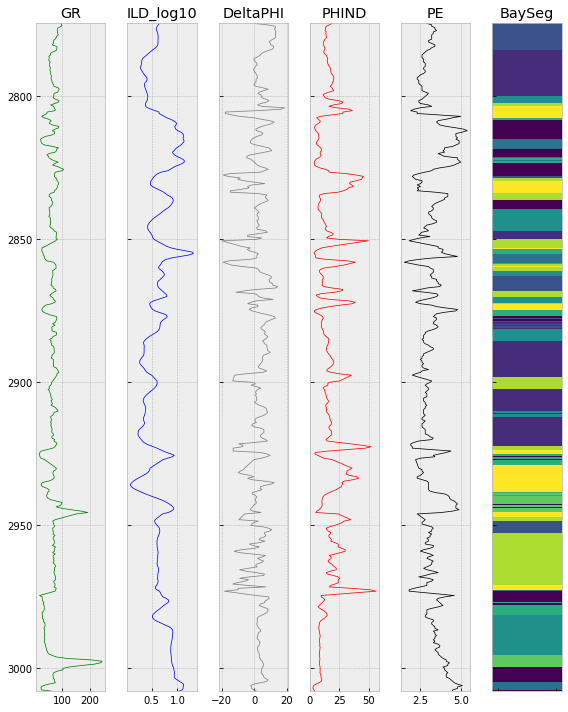

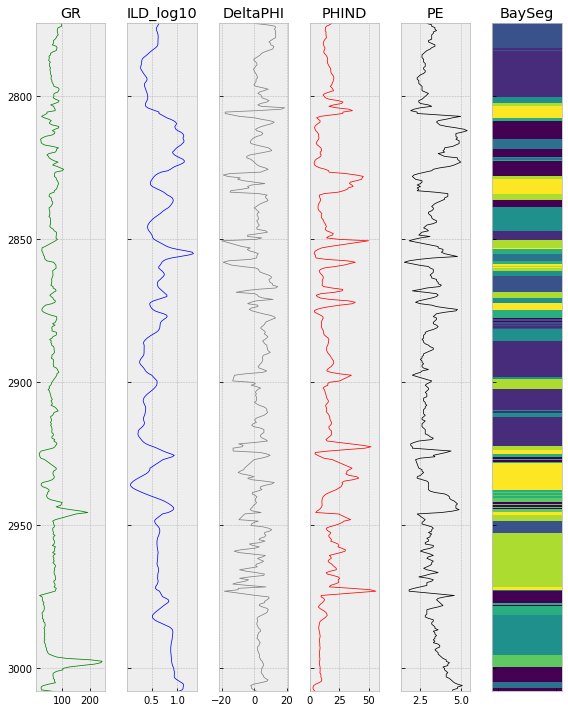

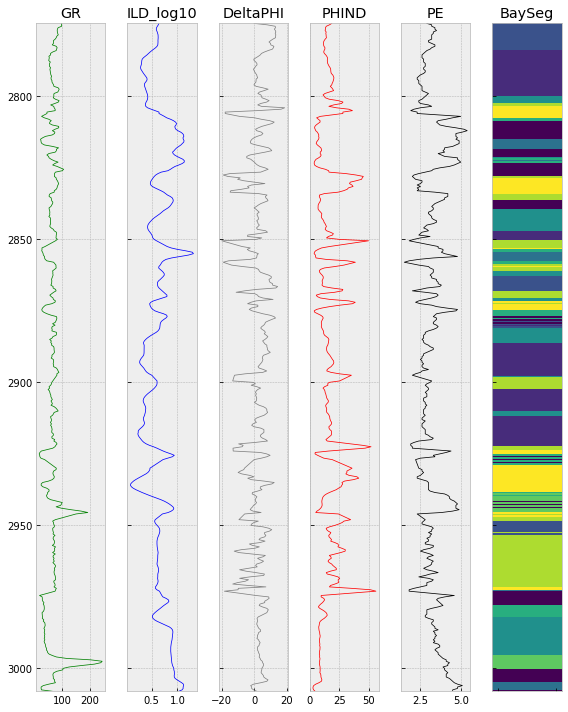

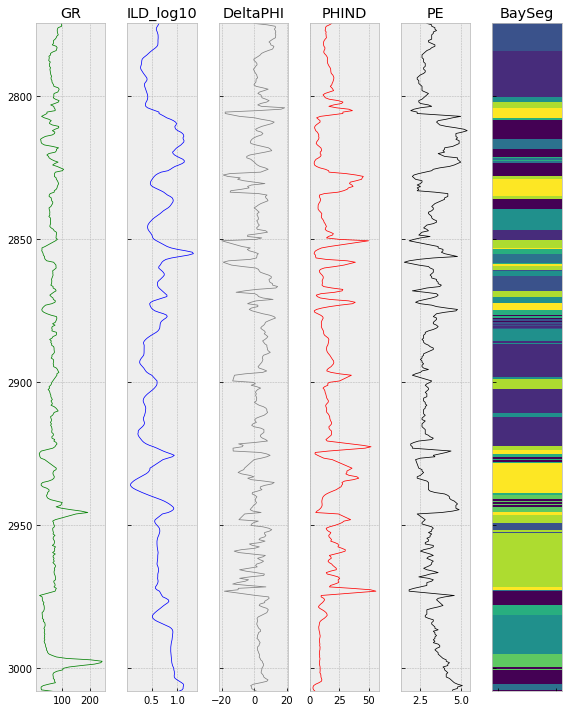

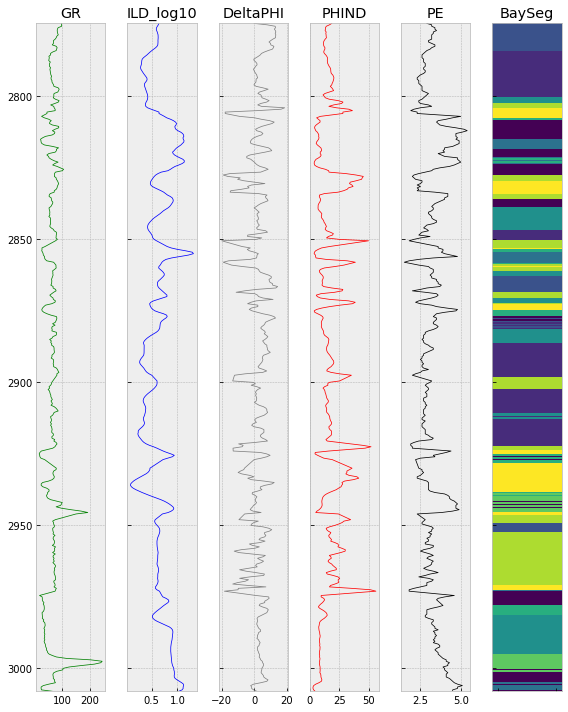

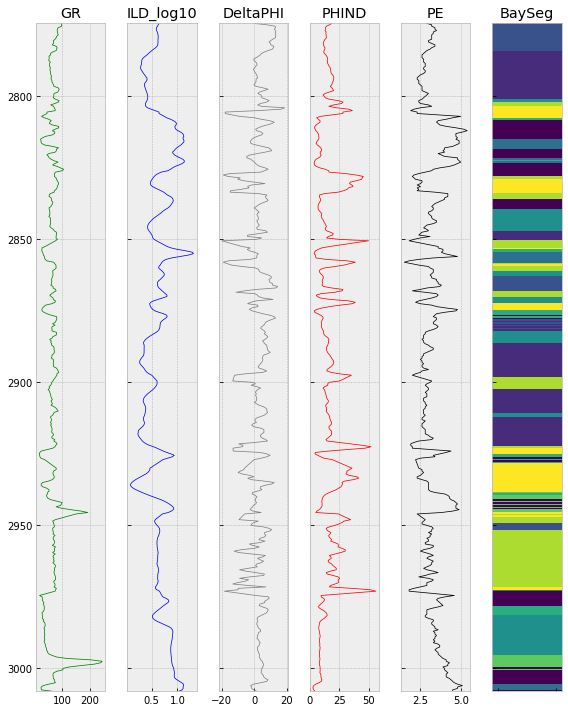

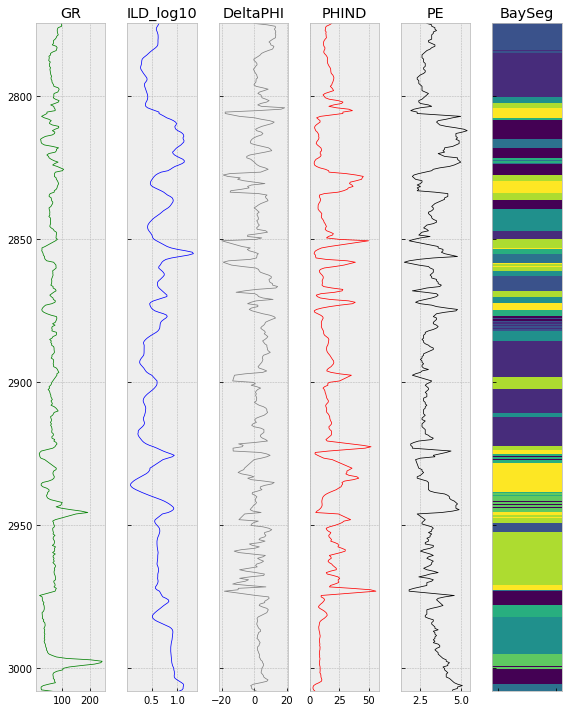

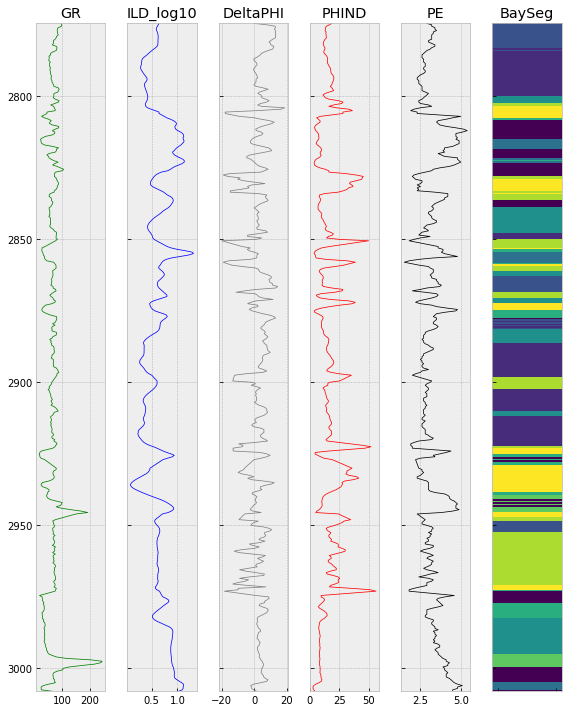

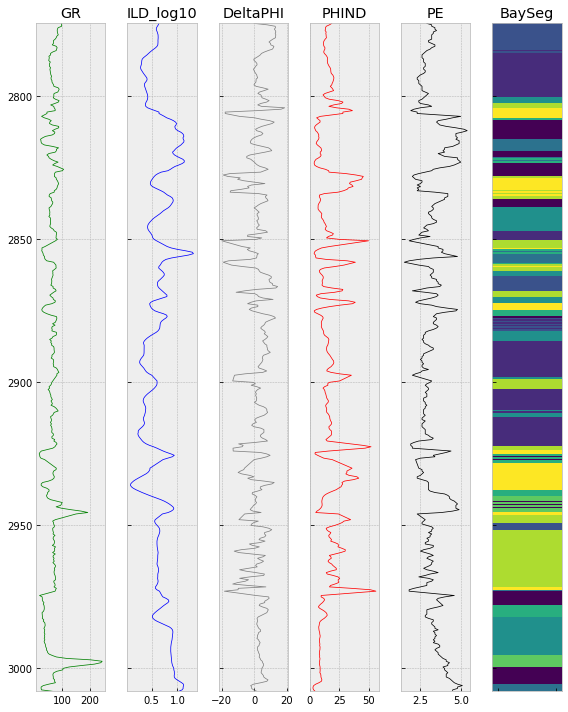

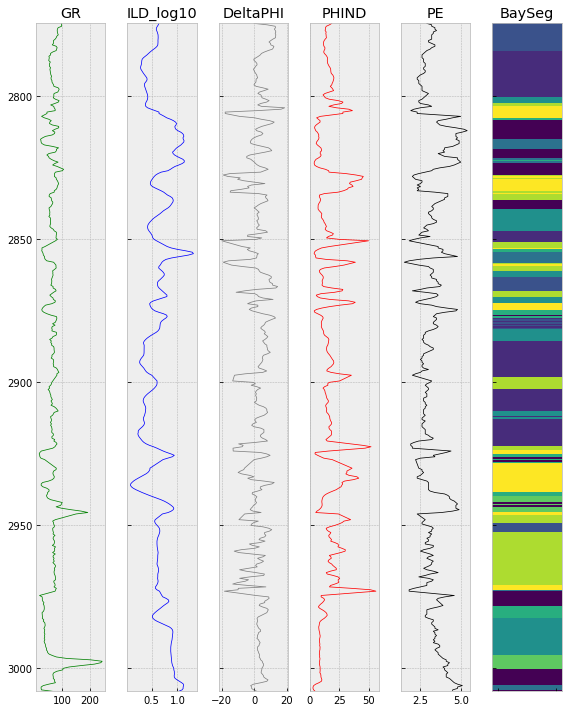

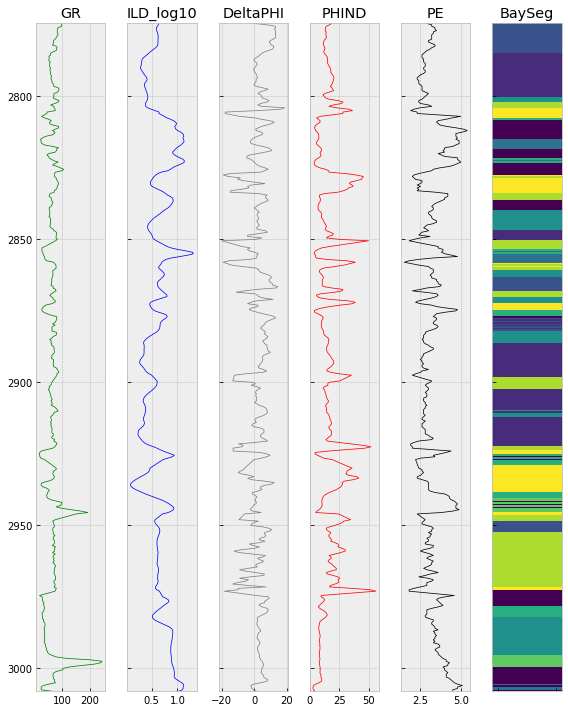

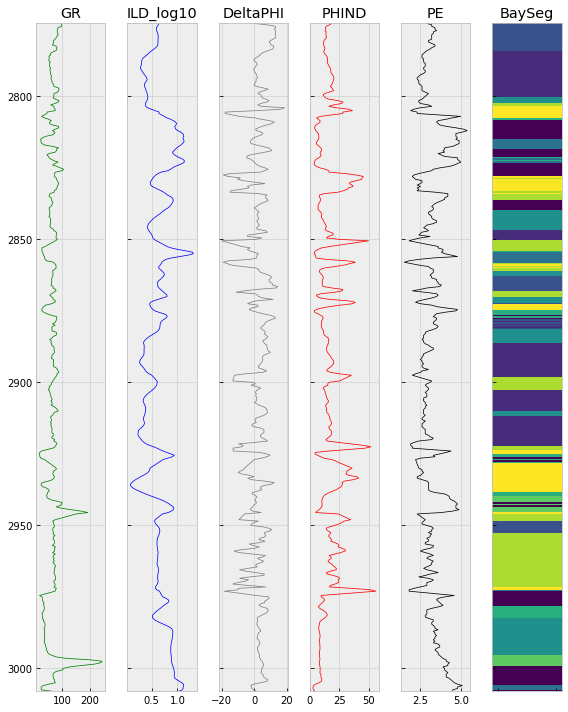

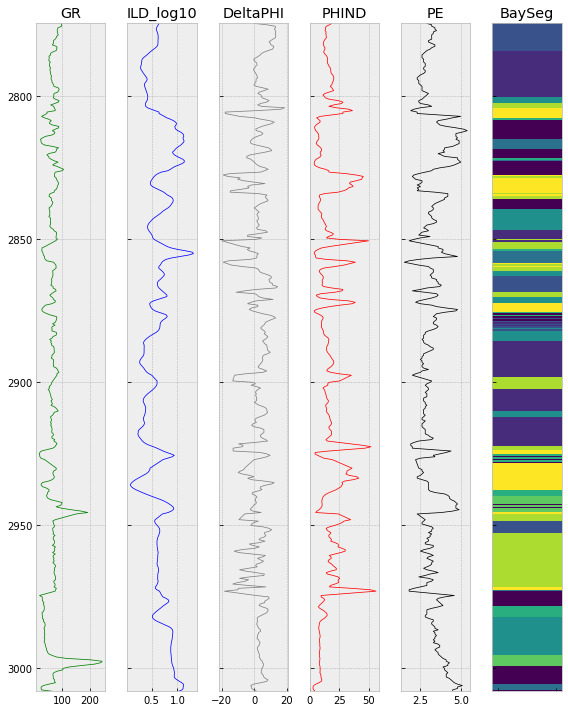

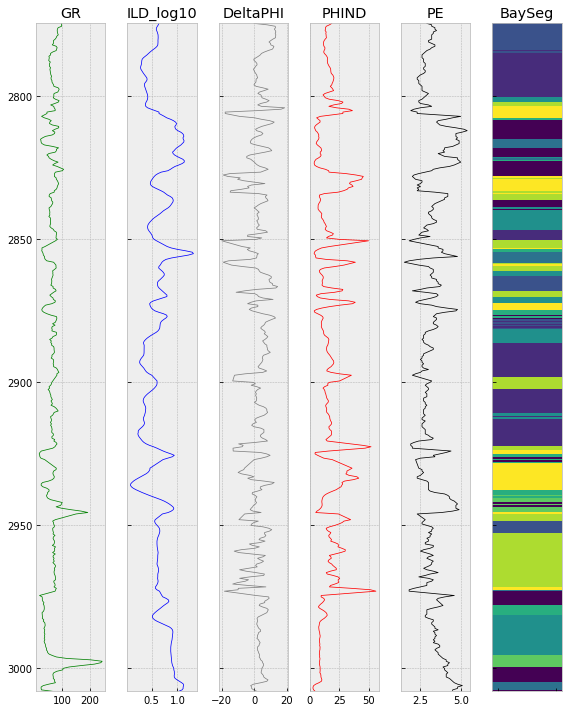

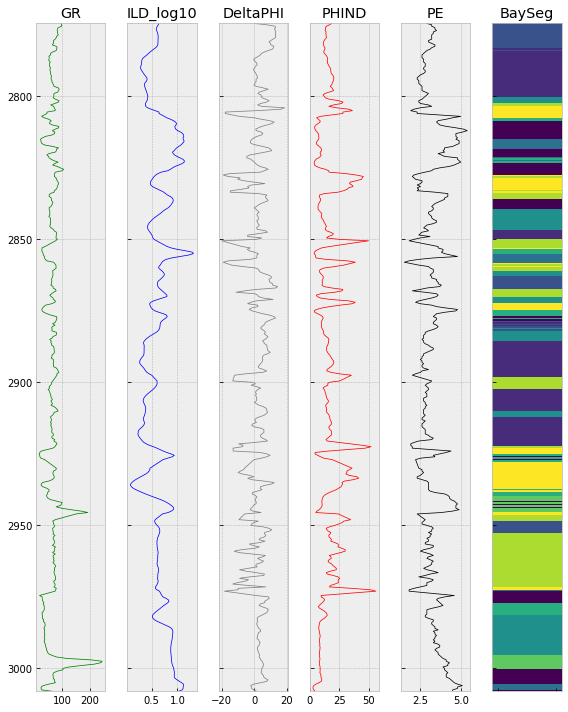

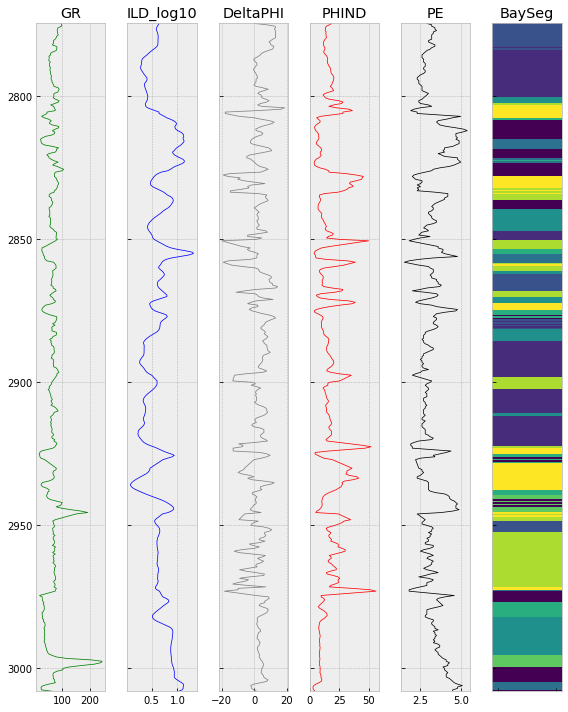

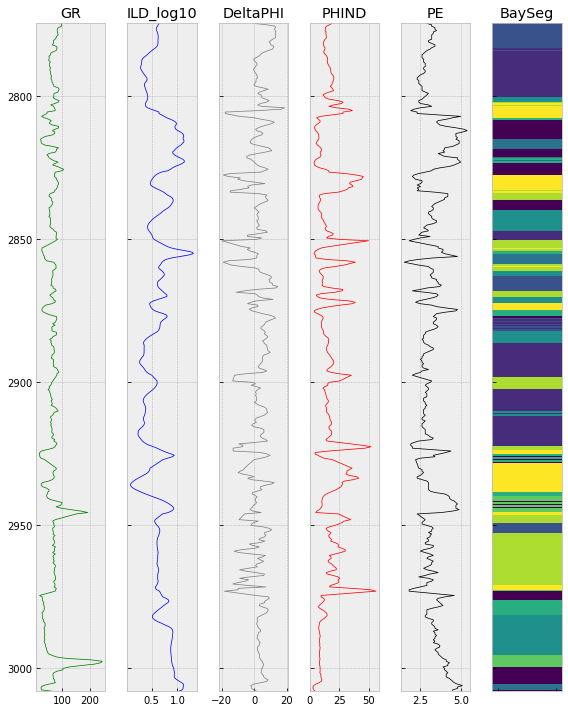

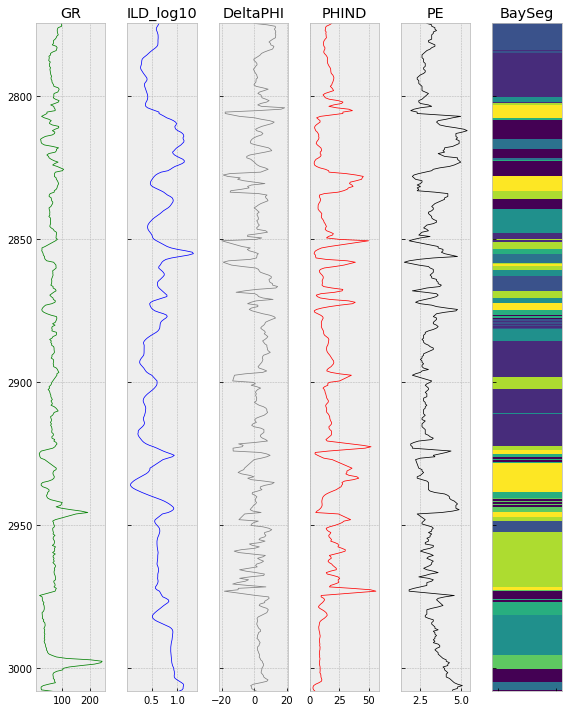

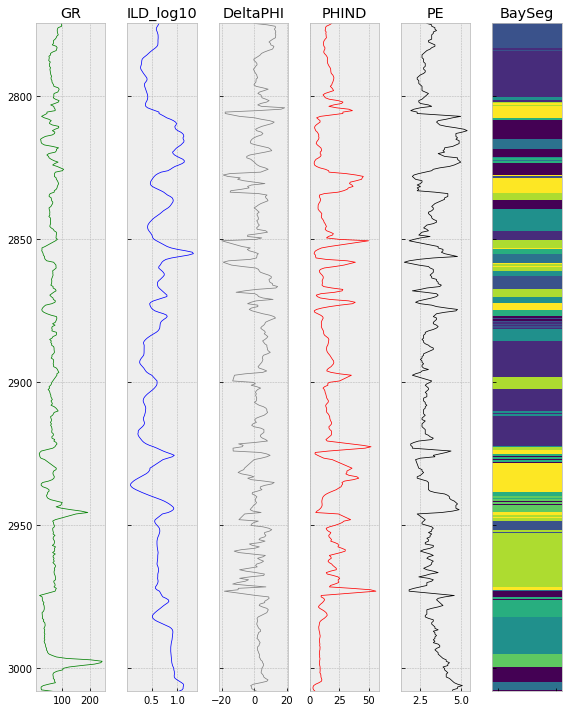

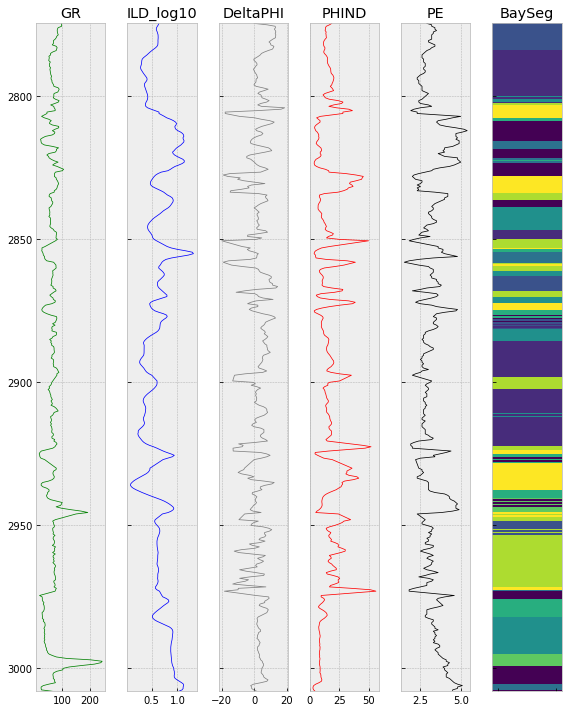

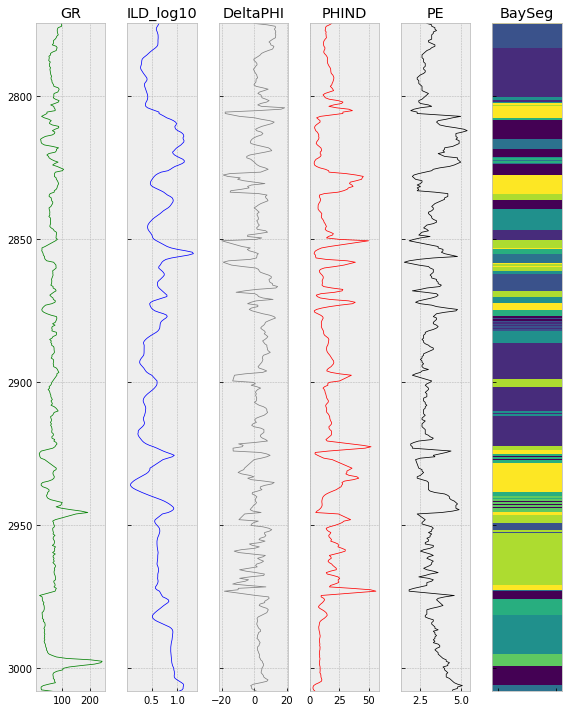

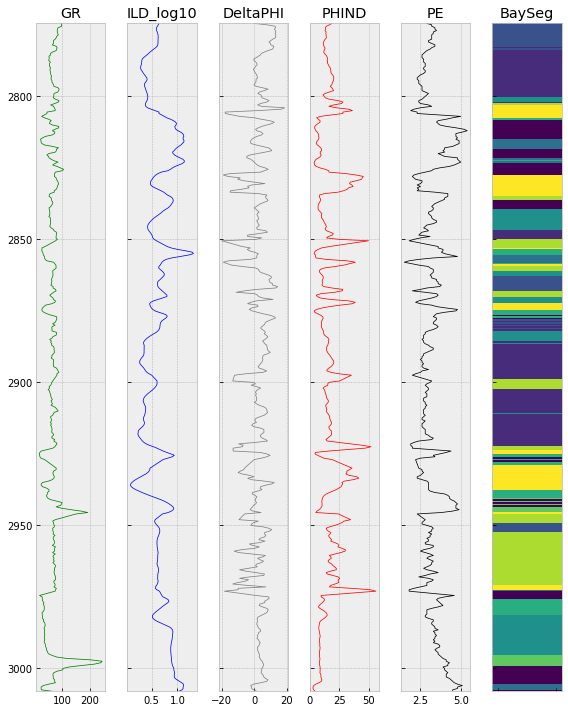

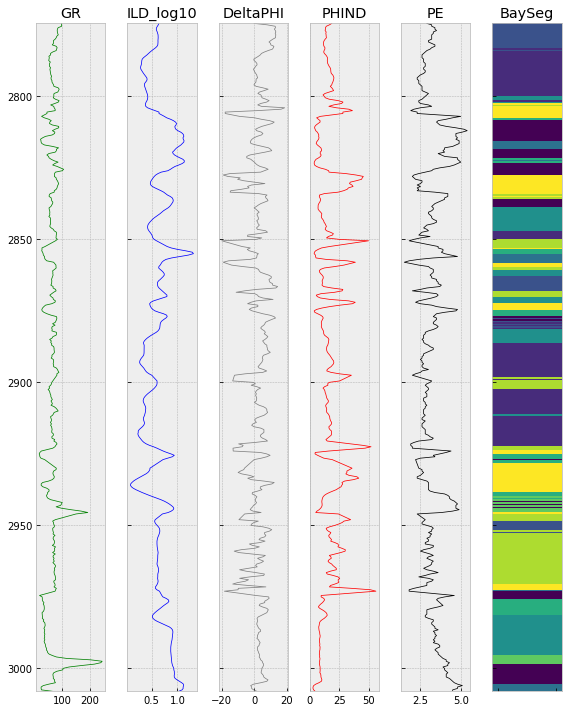

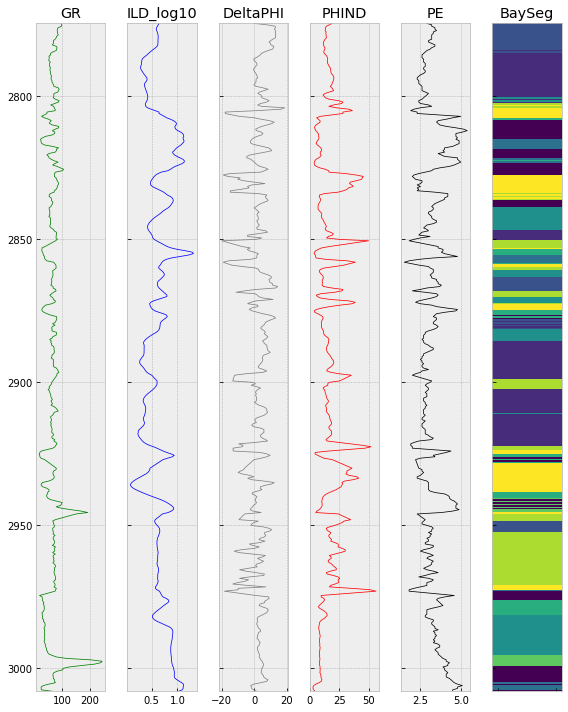

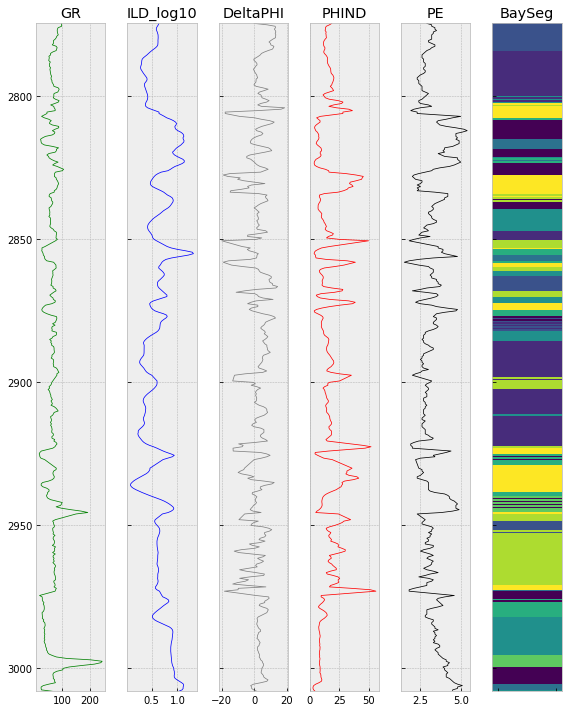

In [173]:
for i, label in enumerate(clf.labels[:50]):
    plot_log(test_well, feature_names, segmentation=label[indeces])
    plt.savefig("figures/label_"+str(i)+".png")

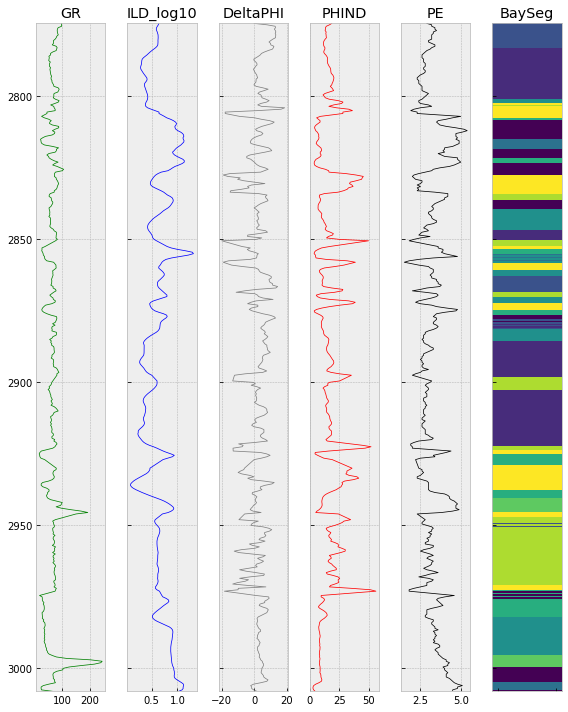

In [168]:
plot_log(test_well, feature_names, segmentation=clf.labels[-1][indeces])

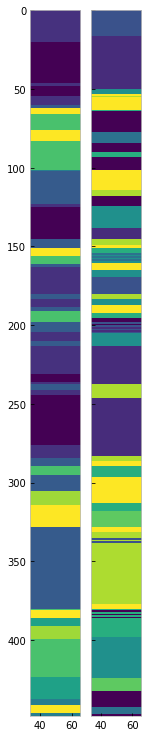

In [28]:
sol = np.repeat(np.expand_dims(test_well["Facies"].values, 1), 100, 1)
ml_sol = np.repeat(np.expand_dims(clf.labels[-1][indeces], 1), 100, 1)

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(2,13))

ax[0].imshow(sol, cmap="viridis")
ax[1].imshow(ml_sol, cmap="viridis")
np.count_nonzero(sol[:,1]-ml_sol[:,1])

ax[0].grid(False)
ax[1].grid(False)

In [30]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

In [29]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)